Start with autoreload magic; this reloads modules automatically before entering the execution of code and thus enabled development in modules like util.py

In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import os
from glob import glob

import numpy as np
import xarray as xr
import pandas as pd

import matplotlib.pyplot as plt

import config

import util

In [11]:
obspack_dir = "/glade/work/mclong/sno-analysis/obspack_co2_1_GLOBALVIEWplus_v7.0_2021-08-18/data/nc"
surface_files = [
    f"{obspack_dir}/co2_alt_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_brw_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_cba_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_cgo_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_kum_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_ljo_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_mlo_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_psa_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_smo_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_spo_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_gould_shipboard-insitu_1_allvalid.nc",
]

obspack_files = {}
for f in surface_files:
    stn = os.path.basename(f).split('_')[1]
    obspack_files[stn] = os.path.basename(f)

### Contribution details
- 128 Obspack text files (e.g. mlo_surface-flask_1_representative.txt)
- 3 ship track files (e.g. HAM_loc.txt)
- example first three lines (includes 10 requested tracers, plus ACTM and Obs):

\# APO NCAR: expt-2022  # Model Info : MIROC4-ACTM_T42L67

 Year MM DD HH MI IS  DoY    UTC   Obs_Lat  Obs_Lon   Alt(m)       apo_jena   co2_gridfed   co2_oco2mip      co2_cesm    co2_somffn       n2_cesm        n2_era    o2_gridfed       o2_cesm    o2_gk01r16  CO2actm_gc3t        CO2obs
 
 2014  9  6  1  0  0  249    3600    51.50     0.50    10.00      377.2772      520.9326      511.4102      365.0510      378.7311      384.5987      412.1419      231.1653      420.1221      401.9648      418.9030     -999.0000


In [26]:
droot = f"{config.project_tmpdir}/simulation-data/MIROC4-ACTM_T42"

path = f"{droot}/{obspack_files['cba'].replace('.nc', '.txt')[4:]}"
print(path)
df = pd.read_csv(path, delim_whitespace=True, header=1, na_values=-599.0000)
df = df.rename({'Year': 'year', 'MM': 'month', 'DD': 'day', 'HH': 'hour', 'MI': 'minute'}, axis=1)

df['time'] = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute']])
df = df.set_index('time')
df = df.dropna()
df

# kluge - need to make station name dynamic and allow any number of stations
path = f"{droot}/{obspack_files['psa'].replace('.nc', '.txt')[4:]}"
print(path)
df2 = pd.read_csv(path, delim_whitespace=True, header=1, na_values=-599.0000)
df2 = df2.rename({'Year': 'year', 'MM': 'month', 'DD': 'day', 'HH': 'hour', 'MI': 'minute'}, axis=1)

df2['time'] = pd.to_datetime(df2[['year', 'month', 'day', 'hour', 'minute']])
df2 = df2.set_index('time')
df2 = df2.dropna()
df2

/glade/work/stephens/sno-analysis/simulation-data/MIROC4-ACTM_T42/cba_surface-flask_4_representative.txt
/glade/work/stephens/sno-analysis/simulation-data/MIROC4-ACTM_T42/psa_surface-flask_4_representative.txt


,year,month,day,hour,minute,IS,DoY,UTC,Obs_Lat,Obs_Lon,...,co2_oco2mip,co2_cesm,co2_somffn,n2_cesm,n2_era,o2_gridfed,o2_cesm,o2_gk01r16,CO2actm_gc3t,CO2obs
time,,,,,,,,,,,,,,,,,,,,,
1996-09-06 02:00:00,1996,9,6,2,0,0,250,7200,-64.77,-64.05,...,426.0540,387.4774,392.8191,388.5818,402.2318,358.5483,393.3557,389.1183,-3668.9961,360.9309
1996-09-09 09:38:00,1996,9,9,9,38,0,253,34680,-64.77,-64.05,...,426.0431,387.5983,392.7548,388.1665,401.5271,358.5683,395.7592,388.7430,-3668.9961,360.9309
1996-09-20 22:05:00,1996,9,20,22,5,0,264,79500,-64.77,-64.05,...,426.2047,387.3426,392.5372,389.8047,403.1257,358.3017,398.1478,392.0026,-3668.9961,360.9109
1996-09-29 20:53:00,1996,9,29,20,53,0,273,75180,-64.77,-64.05,...,426.2702,387.3516,392.6145,390.1786,403.8352,358.1964,399.9285,393.1039,-3668.9961,361.1308
1996-10-08 22:20:00,1996,10,8,22,20,0,282,80400,-64.77,-64.05,...,426.2477,387.4518,392.7188,388.7488,402.8504,358.2291,396.5013,391.6429,-3668.9961,361.0009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-17 15:00:00,2020,9,17,15,0,0,261,54000,-64.77,-64.05,...,519.3456,355.7073,371.4539,374.0375,400.8259,227.6409,410.7406,392.0955,412.0595,411.1152
2020-09-30 13:20:00,2020,9,30,13,20,0,274,48000,-64.77,-64.05,...,519.3867,355.7188,371.3002,373.6937,403.5558,227.5820,410.8797,392.1607,412.0569,411.0953
2020-10-14 13:40:00,2020,10,14,13,40,0,288,49200,-64.77,-64.05,...,519.6227,355.3878,371.2388,375.3978,406.6573,227.2539,412.5096,392.3393,412.1366,411.4046


In [27]:
# add derived APO variables

df['apo_cesm'] = util.compute_apo (
    o2=df['o2_cesm'],
    co2=df['co2_cesm'],
    n2=df['n2_cesm']
)

df['apo_diss'] = util.compute_apo (
    o2=df['o2_gk01r16'],
    co2=df['co2_somffn'],
    n2=df['n2_era']
)

df['apo_gridfed'] = util.compute_apo (
    o2=df['o2_gridfed'],
    co2=df['co2_gridfed'],
    n2=0.0
)

df['apo_oco2mip'] = util.compute_apo (
    o2=df['co2_oco2mip'] * -1.4,
    co2=df['co2_oco2mip'],
    n2=0.0
)

# kluge - need to make station name dynamic and allow any number of stations
df2['apo_cesm'] = util.compute_apo (
    o2=df2['o2_cesm'],
    co2=df2['co2_cesm'],
    n2=df2['n2_cesm']
)

df2['apo_diss'] = util.compute_apo (
    o2=df2['o2_gk01r16'],
    co2=df2['co2_somffn'],
    n2=df2['n2_era']
)

df2['apo_gridfed'] = util.compute_apo (
    o2=df2['o2_gridfed'],
    co2=df2['co2_gridfed'],
    n2=0.0
)

df2['apo_oco2mip'] = util.compute_apo (
    o2=df2['co2_oco2mip'] * -1.4,
    co2=df2['co2_oco2mip'],
    n2=0.0
)

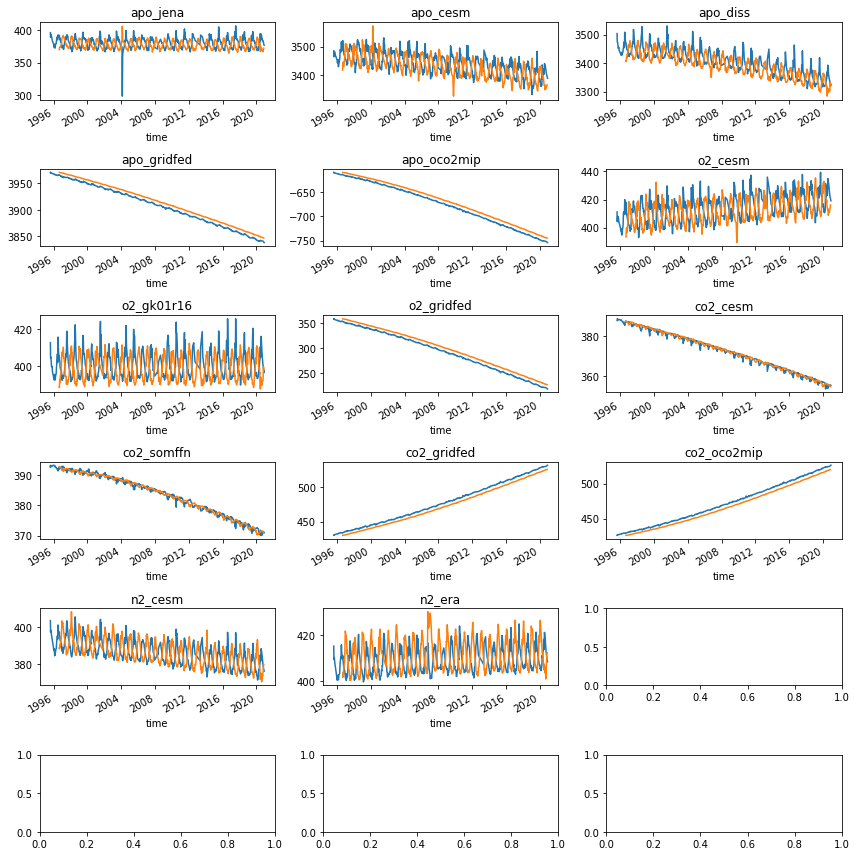

In [29]:
sno_vars = [
    'apo_jena',
    'apo_cesm',
    'apo_diss',
    'apo_gridfed',
    'apo_oco2mip',
    'o2_cesm', 
    'o2_gk01r16',  
    'o2_gridfed',   
    'co2_cesm', 
    'co2_somffn', 
    'co2_gridfed', 
    'co2_oco2mip', 
    'n2_cesm', 
    'n2_era', 
]

n_plots = len(sno_vars)
ncol = int(np.sqrt(n_plots))
nrow = int(((n_plots / ncol) + n_plots % ncol))
fig, axs = plt.subplots(nrow, ncol, figsize=(12, 12), squeeze=False)

for n, v in enumerate(sno_vars):
    ip, jp = np.unravel_index(n, axs.shape)
    
    ax = axs[ip, jp]
    df[v].plot(ax=ax)
    df2[v].plot(ax=ax)
    ax.set_title(v)

plt.tight_layout();    

for n in range(n+1, n_plots):
    ip, jp = np.unravel_index(n, (nrow, ncol))
    axs[ip, jp].remove()
    

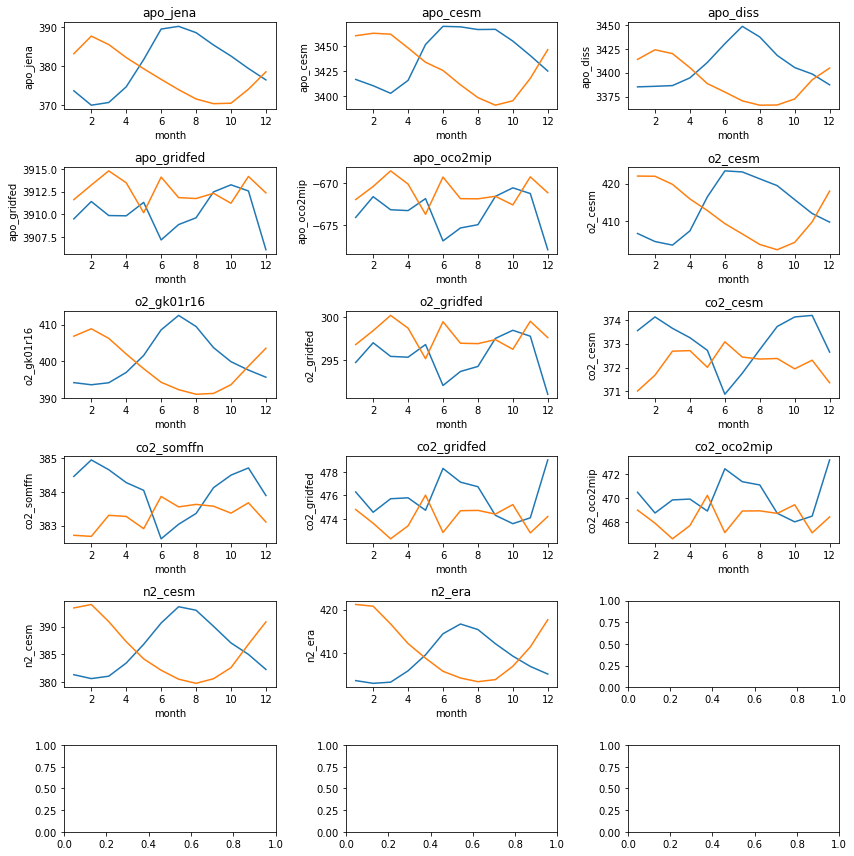

In [31]:
# seasonal climatology
ds = df.to_xarray()
ds_seas=ds.groupby('time.month').mean('time')
ds_seas['apo_cesm']

# kluge - need to make station name dynamic and allow any number of stations
ds2 = df2.to_xarray()
ds2_seas=ds2.groupby('time.month').mean('time')
ds2_seas['apo_cesm']


fig, axs = plt.subplots(nrow, ncol, figsize=(12, 12), squeeze=False)

for n, v in enumerate(sno_vars):
    ip, jp = np.unravel_index(n, axs.shape)
    
    ax = axs[ip, jp]
    ds_seas[v].plot(ax=ax)
    ds2_seas[v].plot(ax=ax)
    ax.set_title(v)

plt.tight_layout();    

for n in range(n+1, n_plots):
    ip, jp = np.unravel_index(n, (nrow, ncol))
    axs[ip, jp].remove()
    

### to do:
- pull request
- add PSA to existing plots
- 4-panel timeseries plot of derived APOs with contributions
- 4-panel seasonal plot of derived APOs with contributions
- 2-panel plot comparing all 5 APOs for both CBA and PSA
- binned mean aircraft cross-sections
- binned harmonic amplitude aircraft cross-sections
- individual campaign segment cross-sections and curtain averages (use existing R for now?)
- observed cross-sections compared to (and subtracted from) integrated fluxes
- same for other ingests
- multimodel comparison notebook
